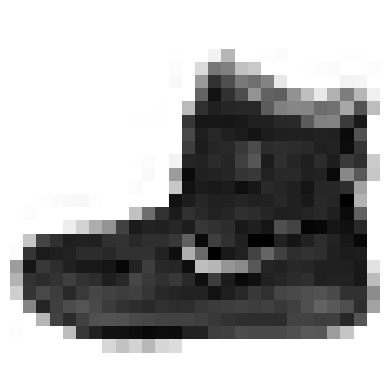

In [28]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from packaging import version
import sklearn
import tensorflow as tf
import numpy as np

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert version.parse(tf.__version__) >= version.parse("2.8.0")

#As we did in previous chapters, let's define the default font sizes to make the figures prettier:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

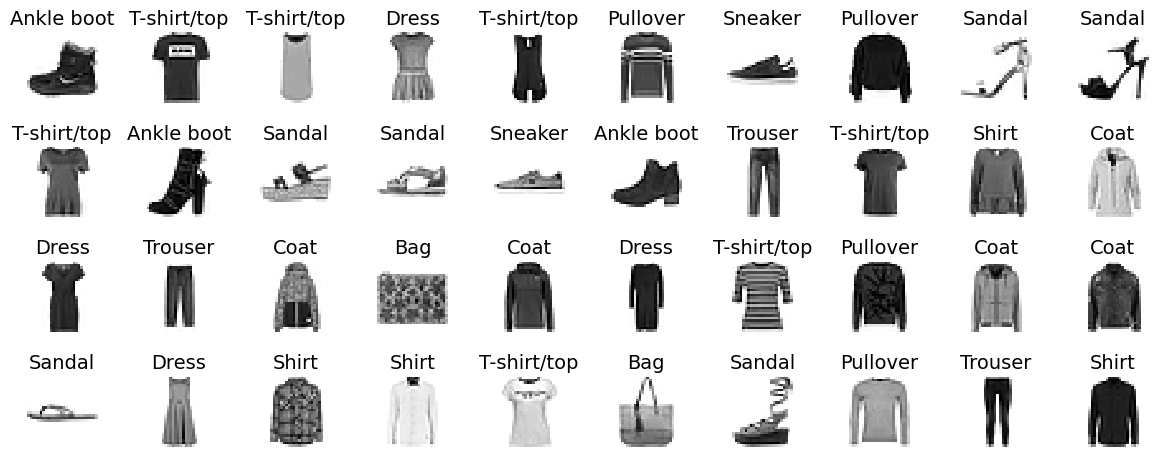

In [15]:

from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [16]:
#Now lets create a model

SyntaxError: invalid syntax (2950054430.py, line 1)

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [18]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7105 - sparse_categorical_accuracy: 0.7658 - val_loss: 0.5078 - val_sparse_categorical_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4847 - sparse_categorical_accuracy: 0.8318 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4397 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.4227 - val_sparse_categorical_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4155 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3947 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3906 - val_sparse_categorical_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3779 - spars

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

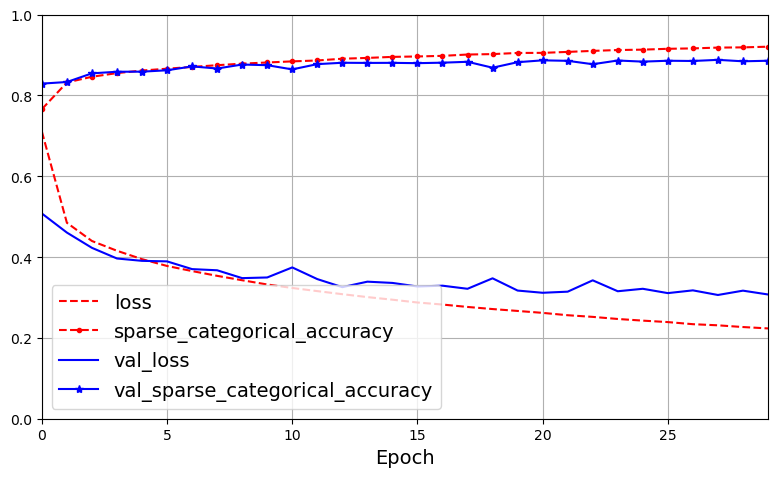

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

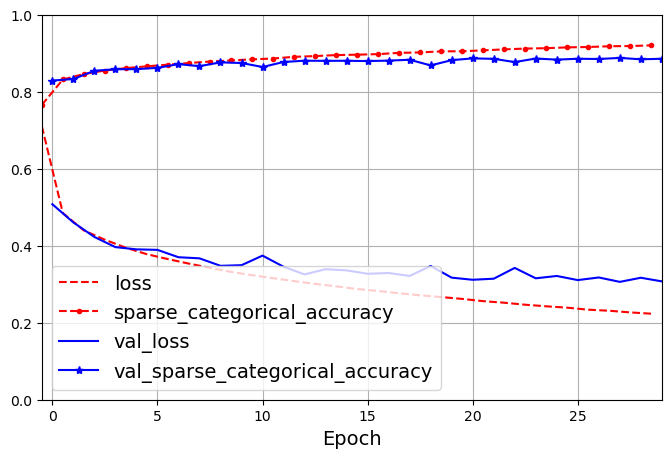

In [29]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 560us/step - loss: 0.3267 - sparse_categorical_accuracy: 0.8810


[0.32666948437690735, 0.8809999823570251]